In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 

In [117]:
"""
What do I need is dVdr = [dVz_dz,dVϕ_dz, dBϕ_dr, ]  
"""

def model(V,z):
    # V = V[Vz,Vϕ,Bz,Bϕ]
    Vt = 1.0;
    m = 1.0;
    a = 1.0;
    K = 1.0;
    R = 1.0;
    
    
    ################################################
    # Γt
    G = (1-4*m**2+3*z**2+4*a**2 * m**2 -8*m**2 * z**2 + 3*z**4 - 4*m**2 * z**4 + z**6)
    ###
    Γt_tr = (m*(z+2*z**3+z**5+2*m-a*m*a**2+4*m*z**2+4*m*a**2 * z**2 + 2*m*z**4))/ (z**2 * G)
    Γt_tz = (m*z*(z+2*z**3+z**5+2*m-6*m*a**2+4*m*z**2+2*m*z**4))/(z**2 * G)
    Γt_rt = Γt_tr
    Γt_rϕ = (-m*a*(z+4*m))/(G)
    Γt_ϕr = Γt_rϕ
    Γt_ϕz = (-m*a*z*(3*z+4*m))/(G)
    Γt_zt = Γt_tz
    Γt_zϕ = Γt_ϕz
    ################################################
    # Γr
    H = (z+2*m)*z**2
    ####
    Γr_tt = m/H
    Γr_tϕ = (2*m*a)/H
    Γr_rr = -m/H
    Γr_rz = -m*z/H
    Γr_ϕt = 2*m*a/H
    Γr_ϕϕ = -1*(z**3+m+2*m*z**2)/H
    Γr_zr = (-m*z)/H
    Γr_zz = m/H
   #######################
    # Γϕ
    Γϕ_tz = ((a*m*z)*(-4*m+3*z))/(G)
    Γϕ_zϕ = (-1*(m*z)*(z+2*z**3+z**5-2*m+6*m*a**2-4*m*z**2-2*m*z**4))/((1+z**2)*G)
    Γϕ_ϕz = -Γϕ_zϕ
    
    #######################
    # Γz
    L = (1+z**2)*(z+2*m)
    
    Γz_tt = (m*z)/(L)
    Γz_tϕ = (-1*(3*m*a*z)/(L*(1+z**2)))
    Γz_rr = (m*z)/(L)
    Γz_rz = (-m*R)/(L)
    Γz_ϕt = (-3*m*a*z*R**2)/(L*(1+z**2))
    Γz_ϕϕ = (m*z)/(L*(1+z**2))
    Γz_zr = -m/L
    Γz_zz = (-m*z)/((1+z**2)*(np.sqrt(z)+2*m))
    
    
########################################################################    
    Jr = 1.0;
    Jϕ = 1.0;
    Jz = 1.0;
    Uϕ = 1.0;
    U0 = 1.0;
####################################       # dVz_dz computation 
    A = (z**1.5 + K*z**2.5);
    dVz_dz = (Γt_ϕz + Γt_zϕ)*(V[0]*V[1]) - \
    (2*V[2]*Jr*Uϕ*U0)/(A*U0**2) - (V[0]*(1.5*z**0.5 - 2.5*K*z**1.5))/(A)
############################################################################   
#     Bz = (2.5*K*(1+2*m/z)*z**1.5)/(Jϕ) 
#     ((A*U0**2)/(Jϕ))*(Γr_tt + 2*dVϕ_dz*Γr_tϕ + dVϕ_dz*dVϕ_dz*Γr_ϕϕ + dVz_dz*dVz_dz*Γr_zz)



    # dVϕ_dz 
    dVϕ_dz = -2*(Γϕ_tz - Γt_tz*V[1]) - V[1]*(Γϕ_zϕ - Γt_zϕ*V[1])- \
    V[1]*(Γϕ_ϕz - Γt_ϕz*V[1]) + (V[2]*Jr)/(V[0]*A*U0**2)
 ############################################     # Bz computation 
    Bz = (2.5*K*(1+2*m/z)*z**1.5)/(Jϕ) + \
    ((A*U0**2)/(Jϕ))*(Γr_tt + 2*dVϕ_dz*Γr_tϕ + dVϕ_dz*dVϕ_dz*Γr_ϕϕ + dVz_dz*dVz_dz*Γr_zz)
#################################################################################    
    D = ((-1.0)/(4*np.pi))*(2*z*(z**2 - 2*m)) + ((-1.0)/(4*np.pi))* \
    (((m*z)*(z**5 - 2*m*z**4 + 2*z**3 - 4*m*z**2 + z + 6*m*a**2 - 2*m)/ \
      (z**6 -4*m**2 * z**4 + 3*z**4 - 8*m**2 * z**2 + 3*z**2+4*a**2 * m**2 - 4*m**2 + 1 ))+\
     (m / z*(z+2*m)) +  ((m*z)/((1+z**2)*(np.sqrt(z)+2*m))))*(z**2 / (z**2 + 2*m)**2)

    Bϕ = (1.0/(D*U0*Uϕ*Bz))*((((U0**2 * A *dVz_dz*dVϕ_dz*(Γt_ϕz + Γt_zϕ))/(2.0)) - \
                          ((U0**2 *dVz_dz*(1.5*z**0.5 - 2.5*K*z**1.5))/(2.0))) + \
                         ((((1 + 2*m/z)*2.5*K*z**1.5)/(2*dVz_dz)) + \
                          (((A*U0**2)/(2*dVz_dz))*\
                           (Γz_tt + 2*dVϕ_dz*Γz_tϕ-2*dVz_dz*dVz_dz*Γt_tz + \
                        dVϕ_dz*dVϕ_dz*Γz_ϕϕ - Γt_zϕ*dVz_dz*dVz_dz*dVϕ_dz - \
                           Γt_ϕz*dVz_dz*dVz_dz*dVϕ_dz + dVz_dz*dVz_dz*Γz_zz)))) 
    
###################################################################################
    dVdz = [dVz_dz, dVϕ_dz, Bz,Bϕ]
    return dVdz

In [135]:
z = np.linspace(3.5,10)   # [2.5,7.3] 
Vz0 = 0.918; # 0.18
Vϕ0 = 0.5;  # 0.918
Bz0 = 1e2;
Bϕ0 = 1e2;

V = odeint(model,[Vz0,Vϕ0,Bz0,Bϕ0],z)

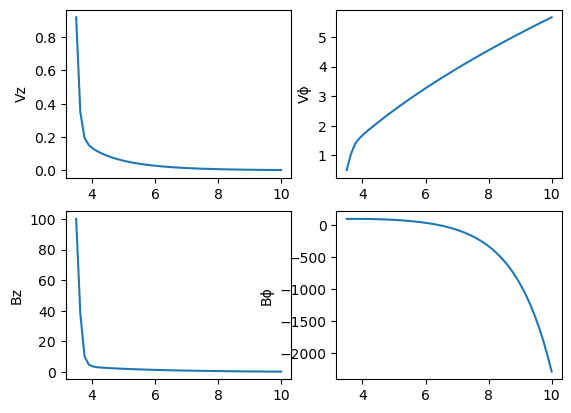

In [136]:

# plt.figure(figsize=(6,6), dpi=900)
plt.subplot(221)
# plt.title("r=[3.5,10] \n Vr0=0.18 \t Vϕ0=0.918 \t Bϕ0=4e4", loc="center")
# plt.xlabel('r')
plt.ylabel('Vz')
plt.plot(z,V[:,0])


plt.subplot(222)
plt.ylabel('Vϕ')
plt.plot(z,V[:,1])


plt.subplot(223)
plt.ylabel('Bz')
plt.plot(z,V[:,2])



plt.subplot(224)
plt.ylabel('Bϕ')
plt.plot(z,V[:,3])
# plt.savefig("all_in_one")


plt.show()

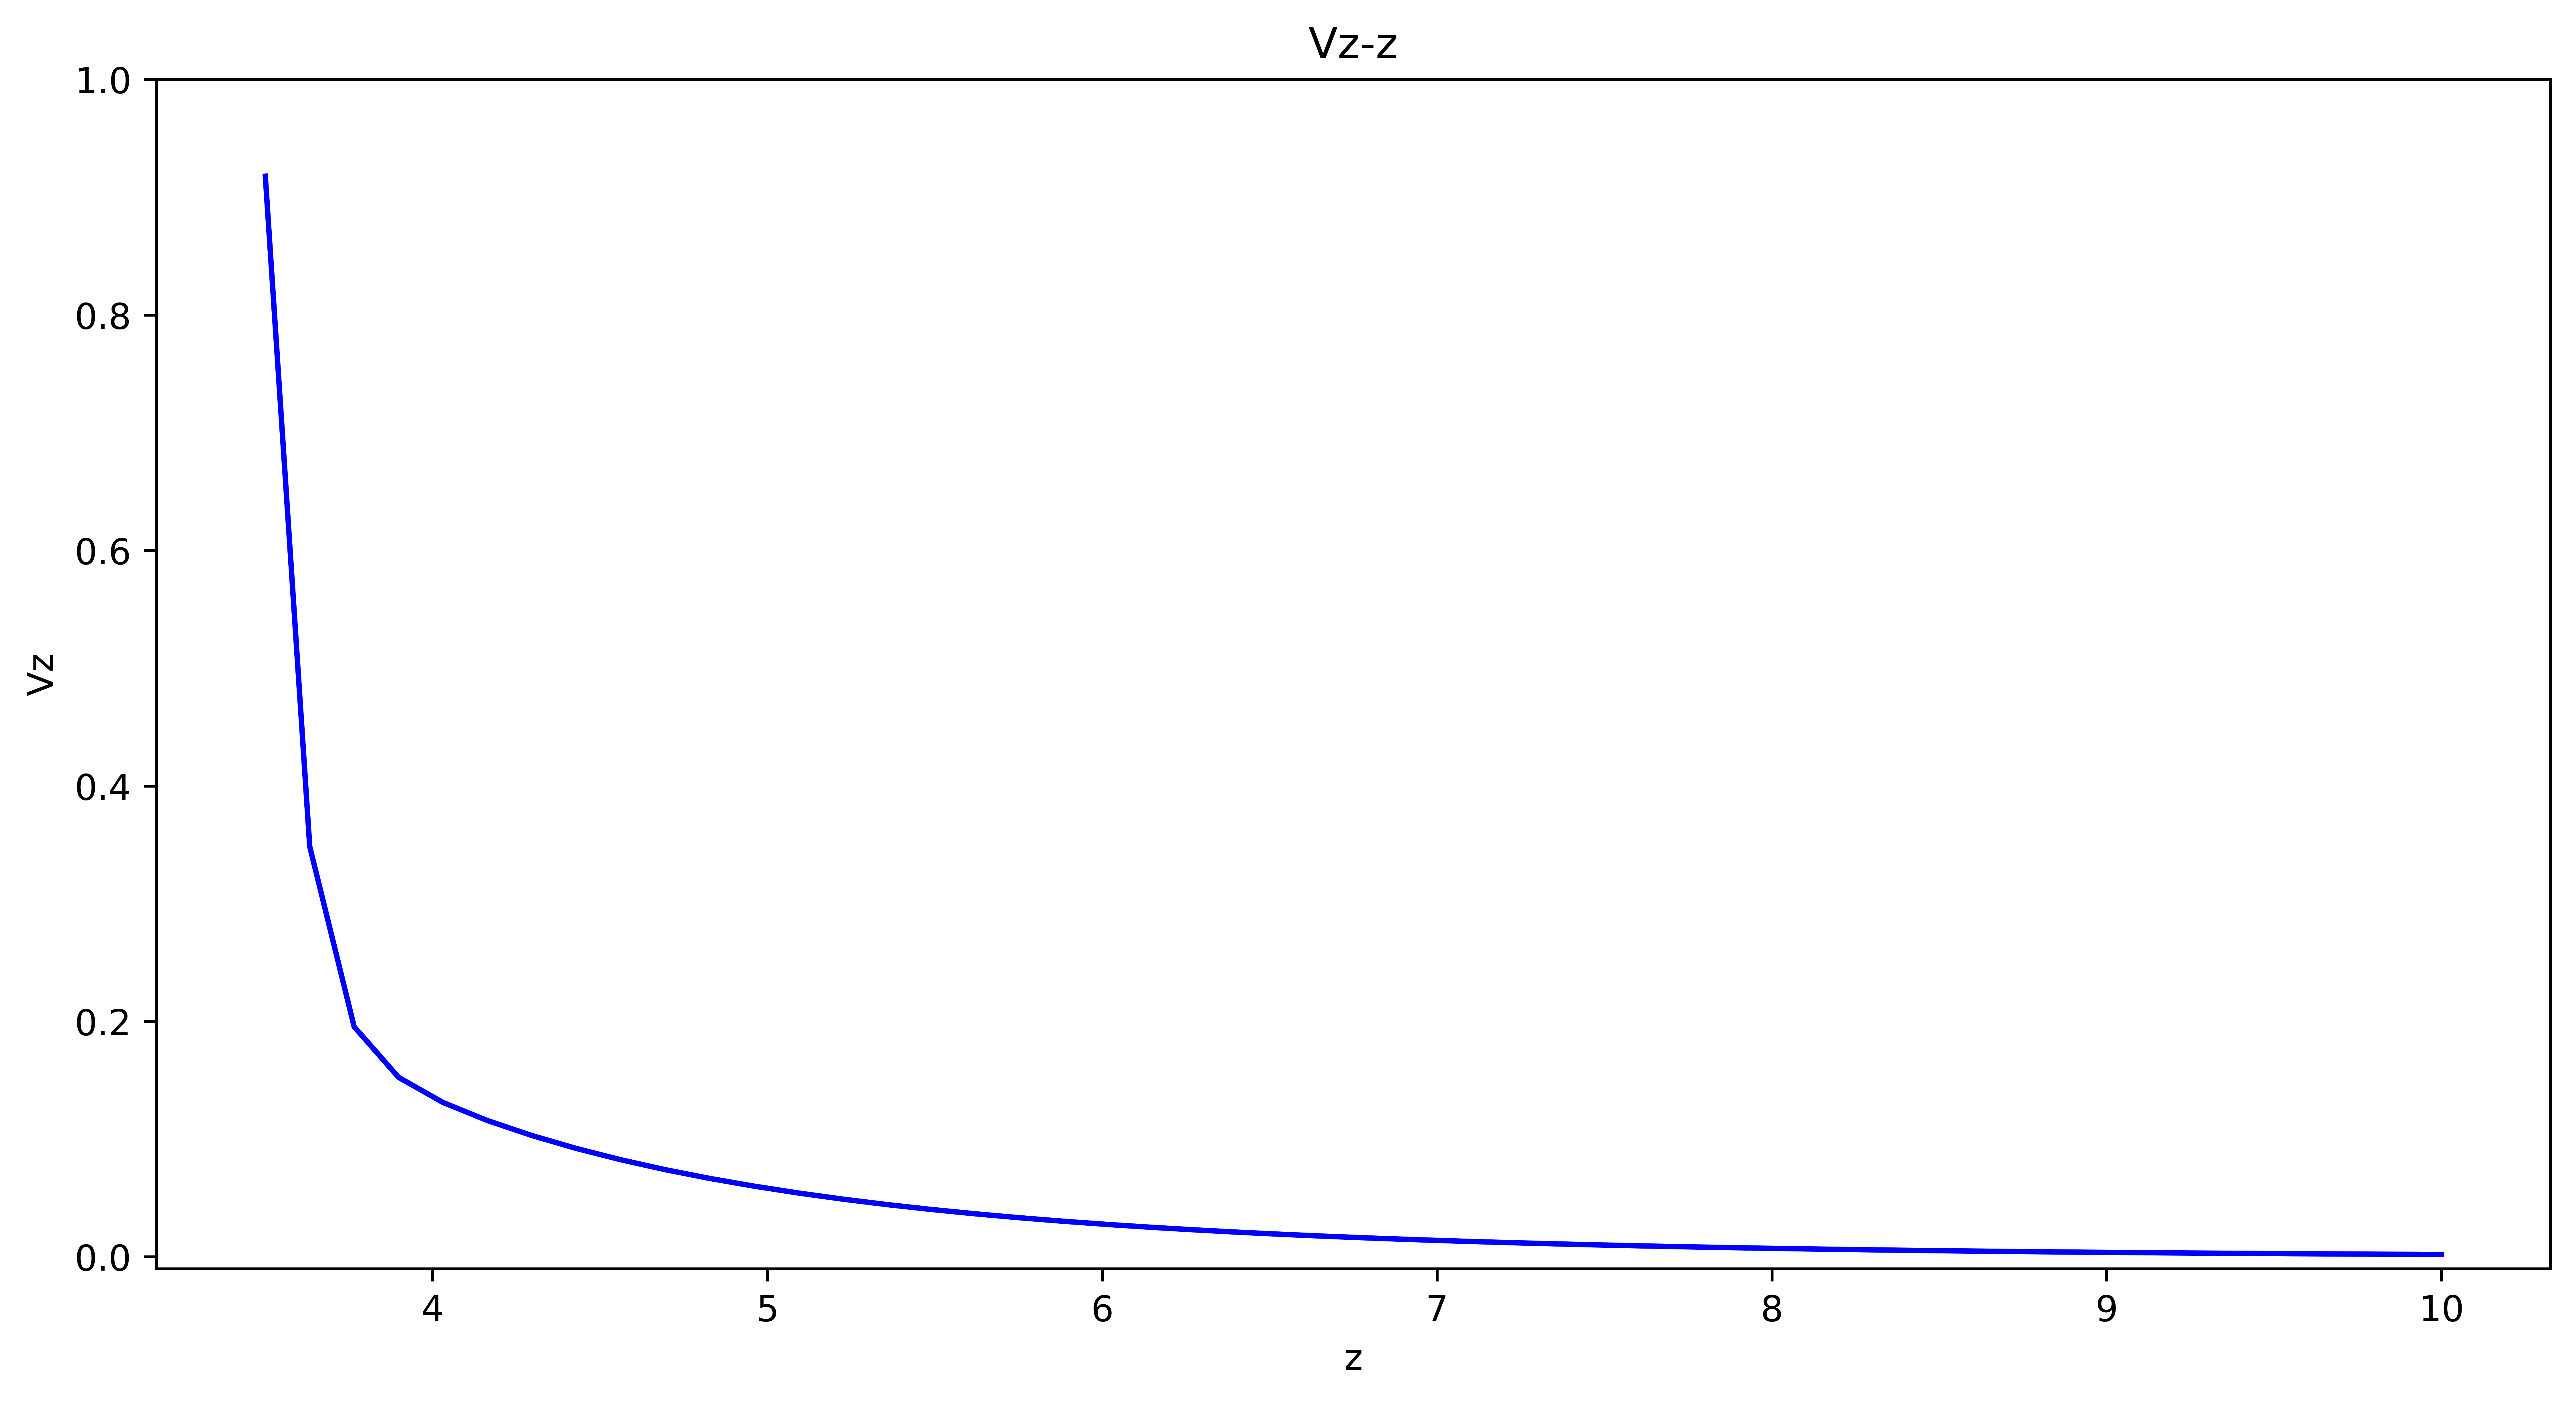

In [145]:
# plt.figure(figsize=(12,6), dpi=900)
plt.plot(z,V[:,0],c='b')
plt.title("Vz-z")
plt.xlabel("z")
plt.ylabel("Vz")
plt.ylim(-0.01,1.0)

# plt.xticks(np.arange(1,20,2))
# plt.yticks(np.arange(0,1.0,0.05))
# plt.xticks(np.arange(3,10.5,0.5))

# plt.savefig("Vz")
plt.show()

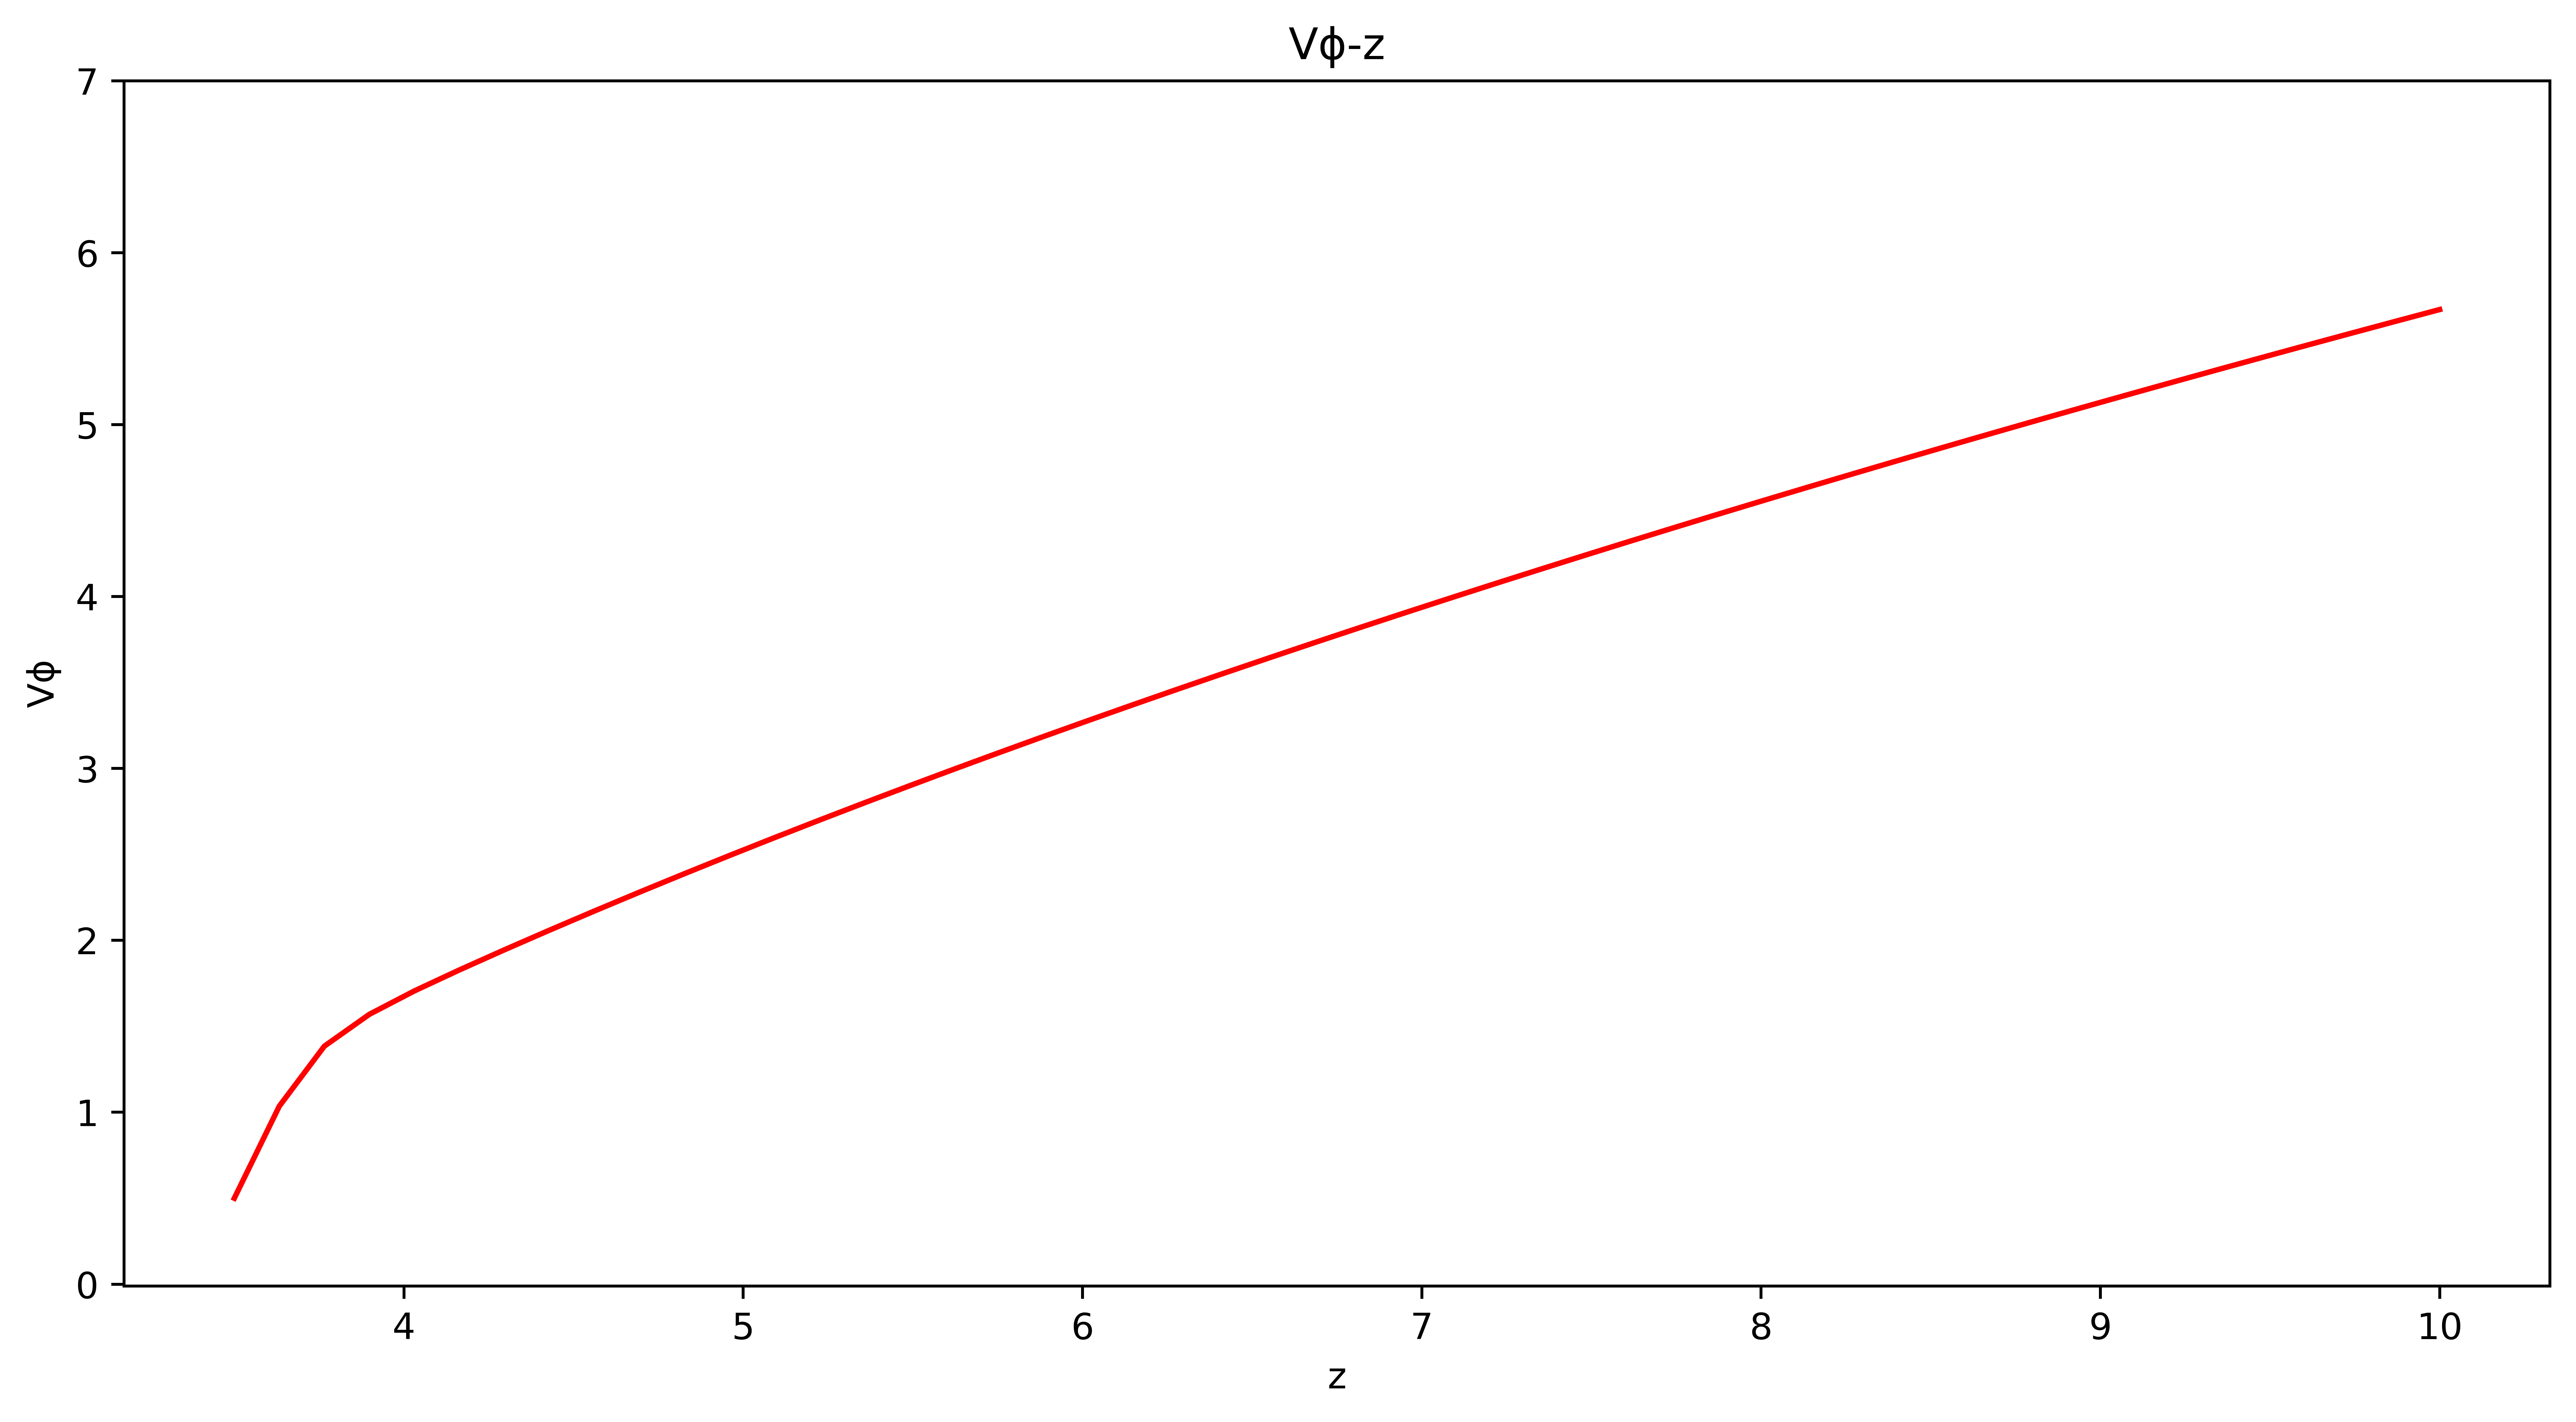

In [142]:
# plt.figure(figsize=(12,6), dpi=900)
plt.plot(z, V[:,1],c='r')
plt.title("Vϕ-z")
plt.xlabel("z")
plt.ylim(-0.01, 7.0)
plt.ylabel("Vϕ")
# plt.xticks(np.arange(3,10.5,0.5))
# plt.yticks(np.arange(0,1,0.05))

# plt.savefig("Vϕ")
plt.show()

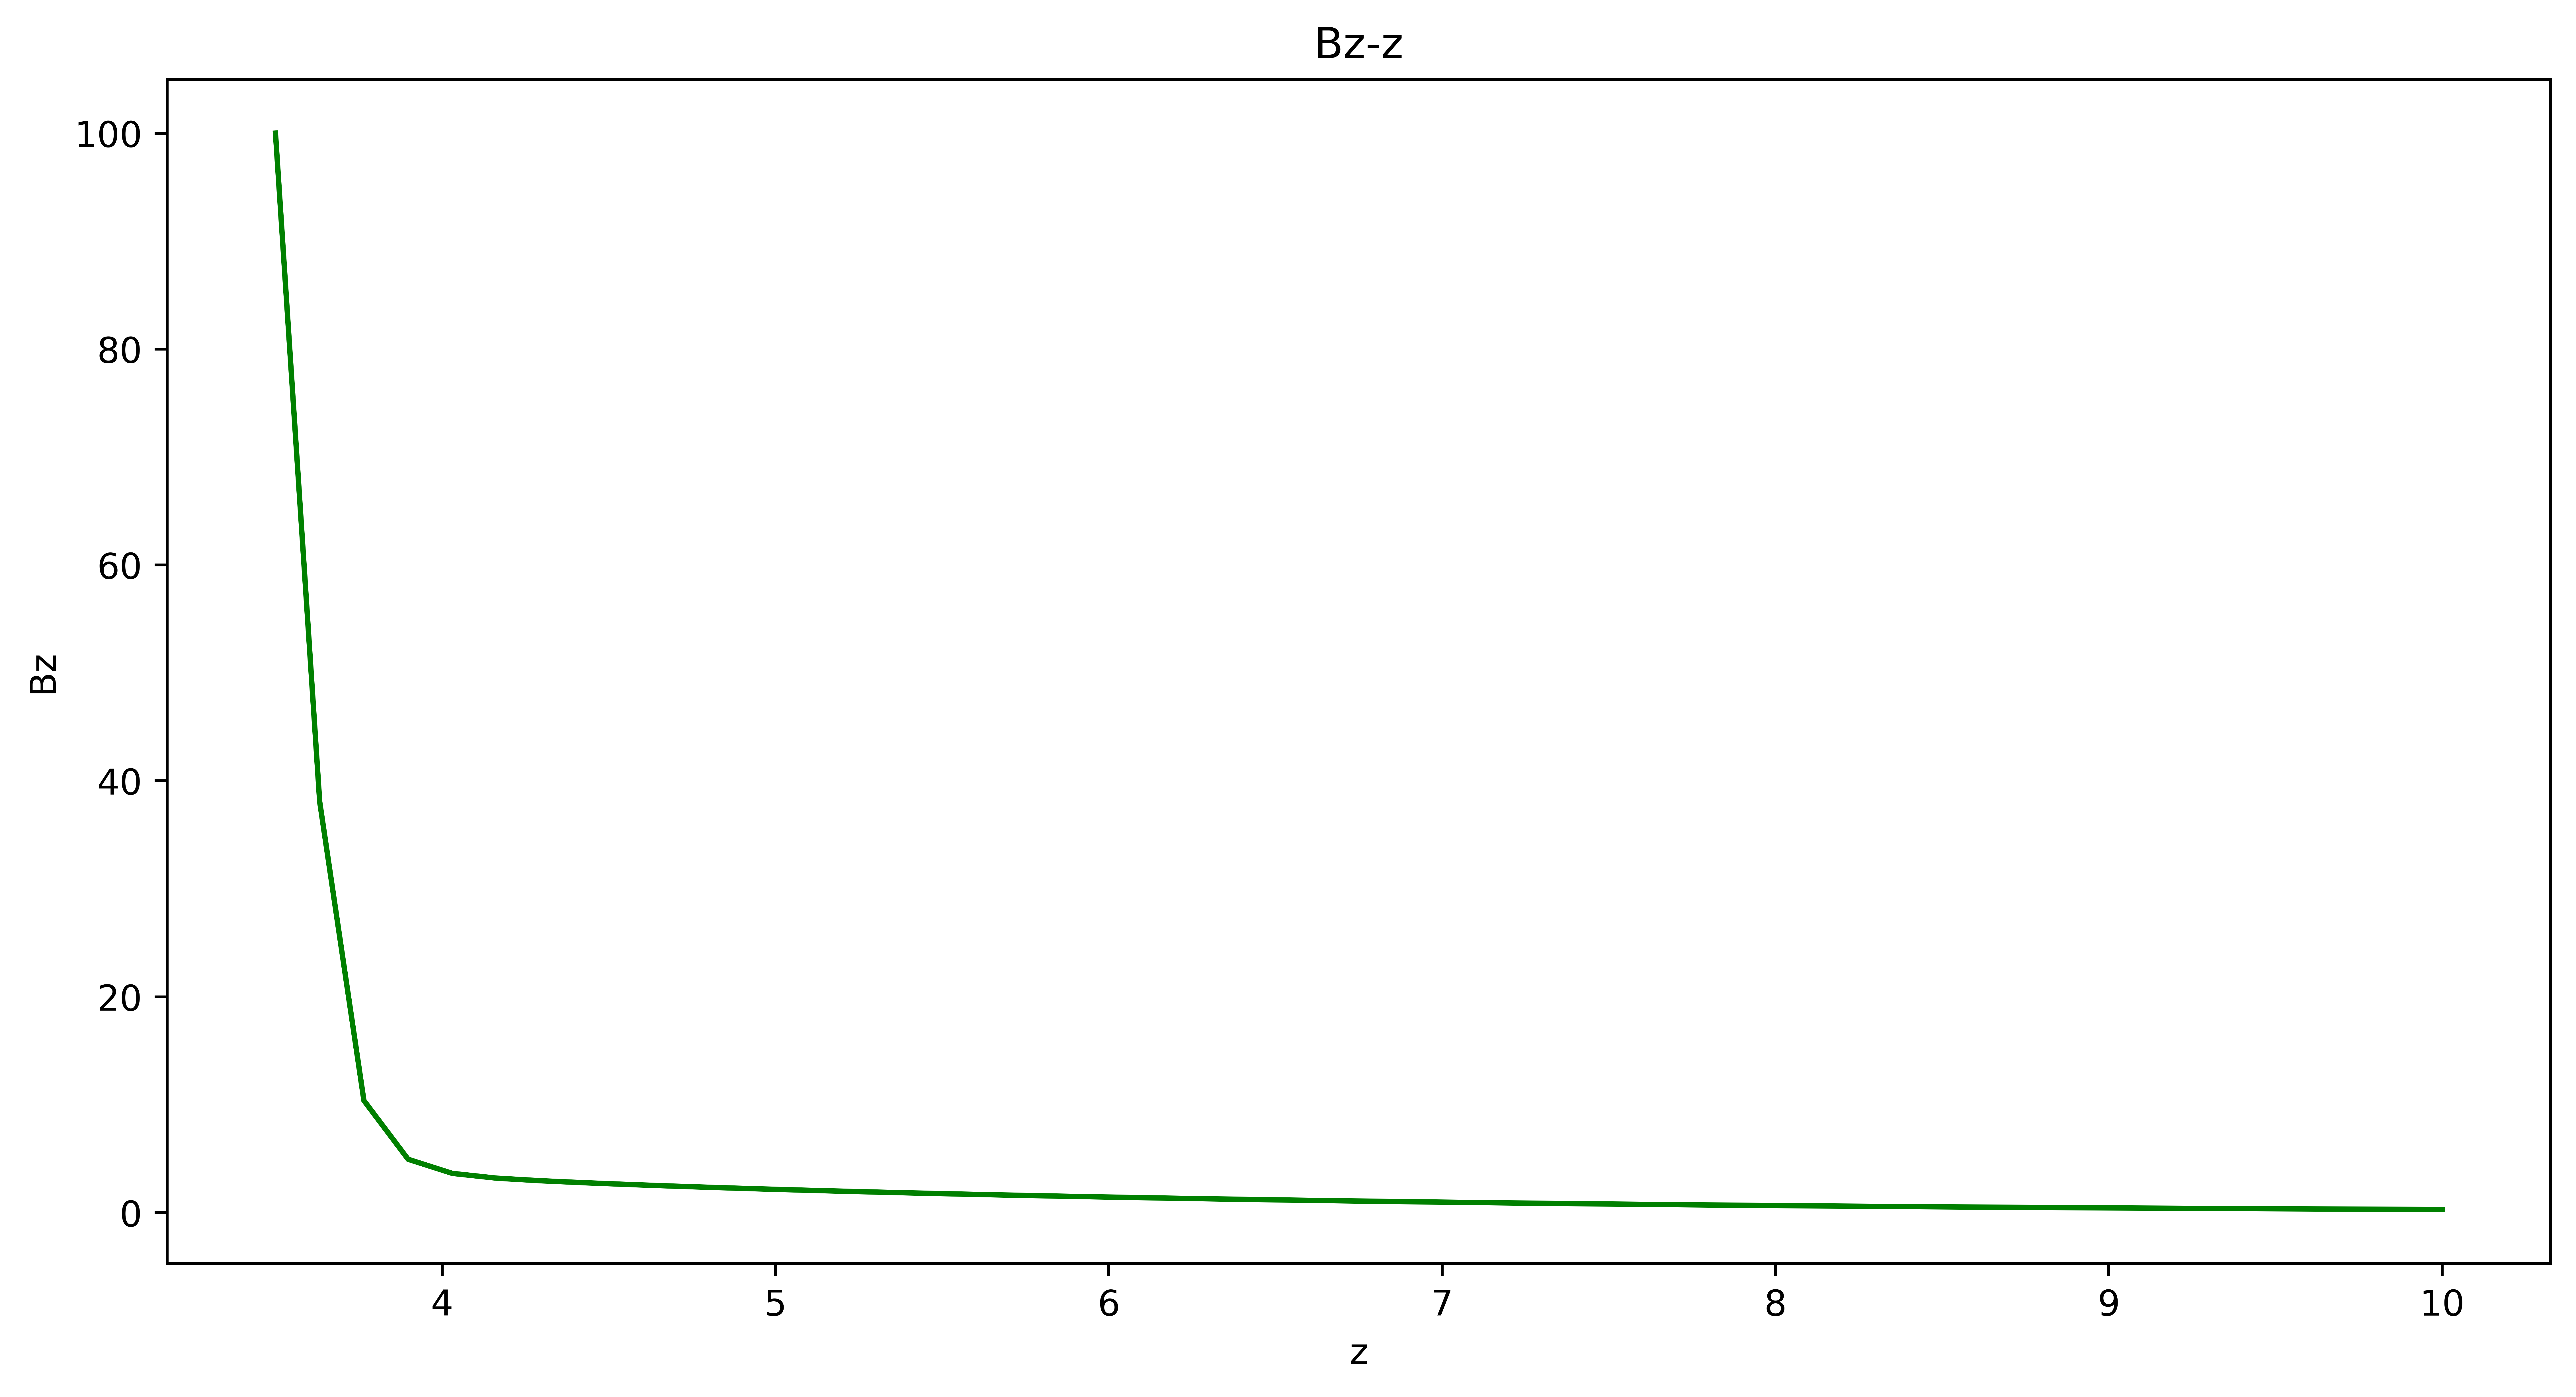

In [153]:
# plt.figure(figsize=(12,6), dpi=900)
plt.plot(z,V[:,2],c='g')
plt.xlabel("z")
plt.ylabel("Bz")
plt.title("Bz-z")
# plt.ylim(-1e3,11e3)
plt.xticks(np.arange(4,11,1))
# plt.yticks(np.arange(0,5e4,5e3))

# plt.savefig("Bz")
plt.show()

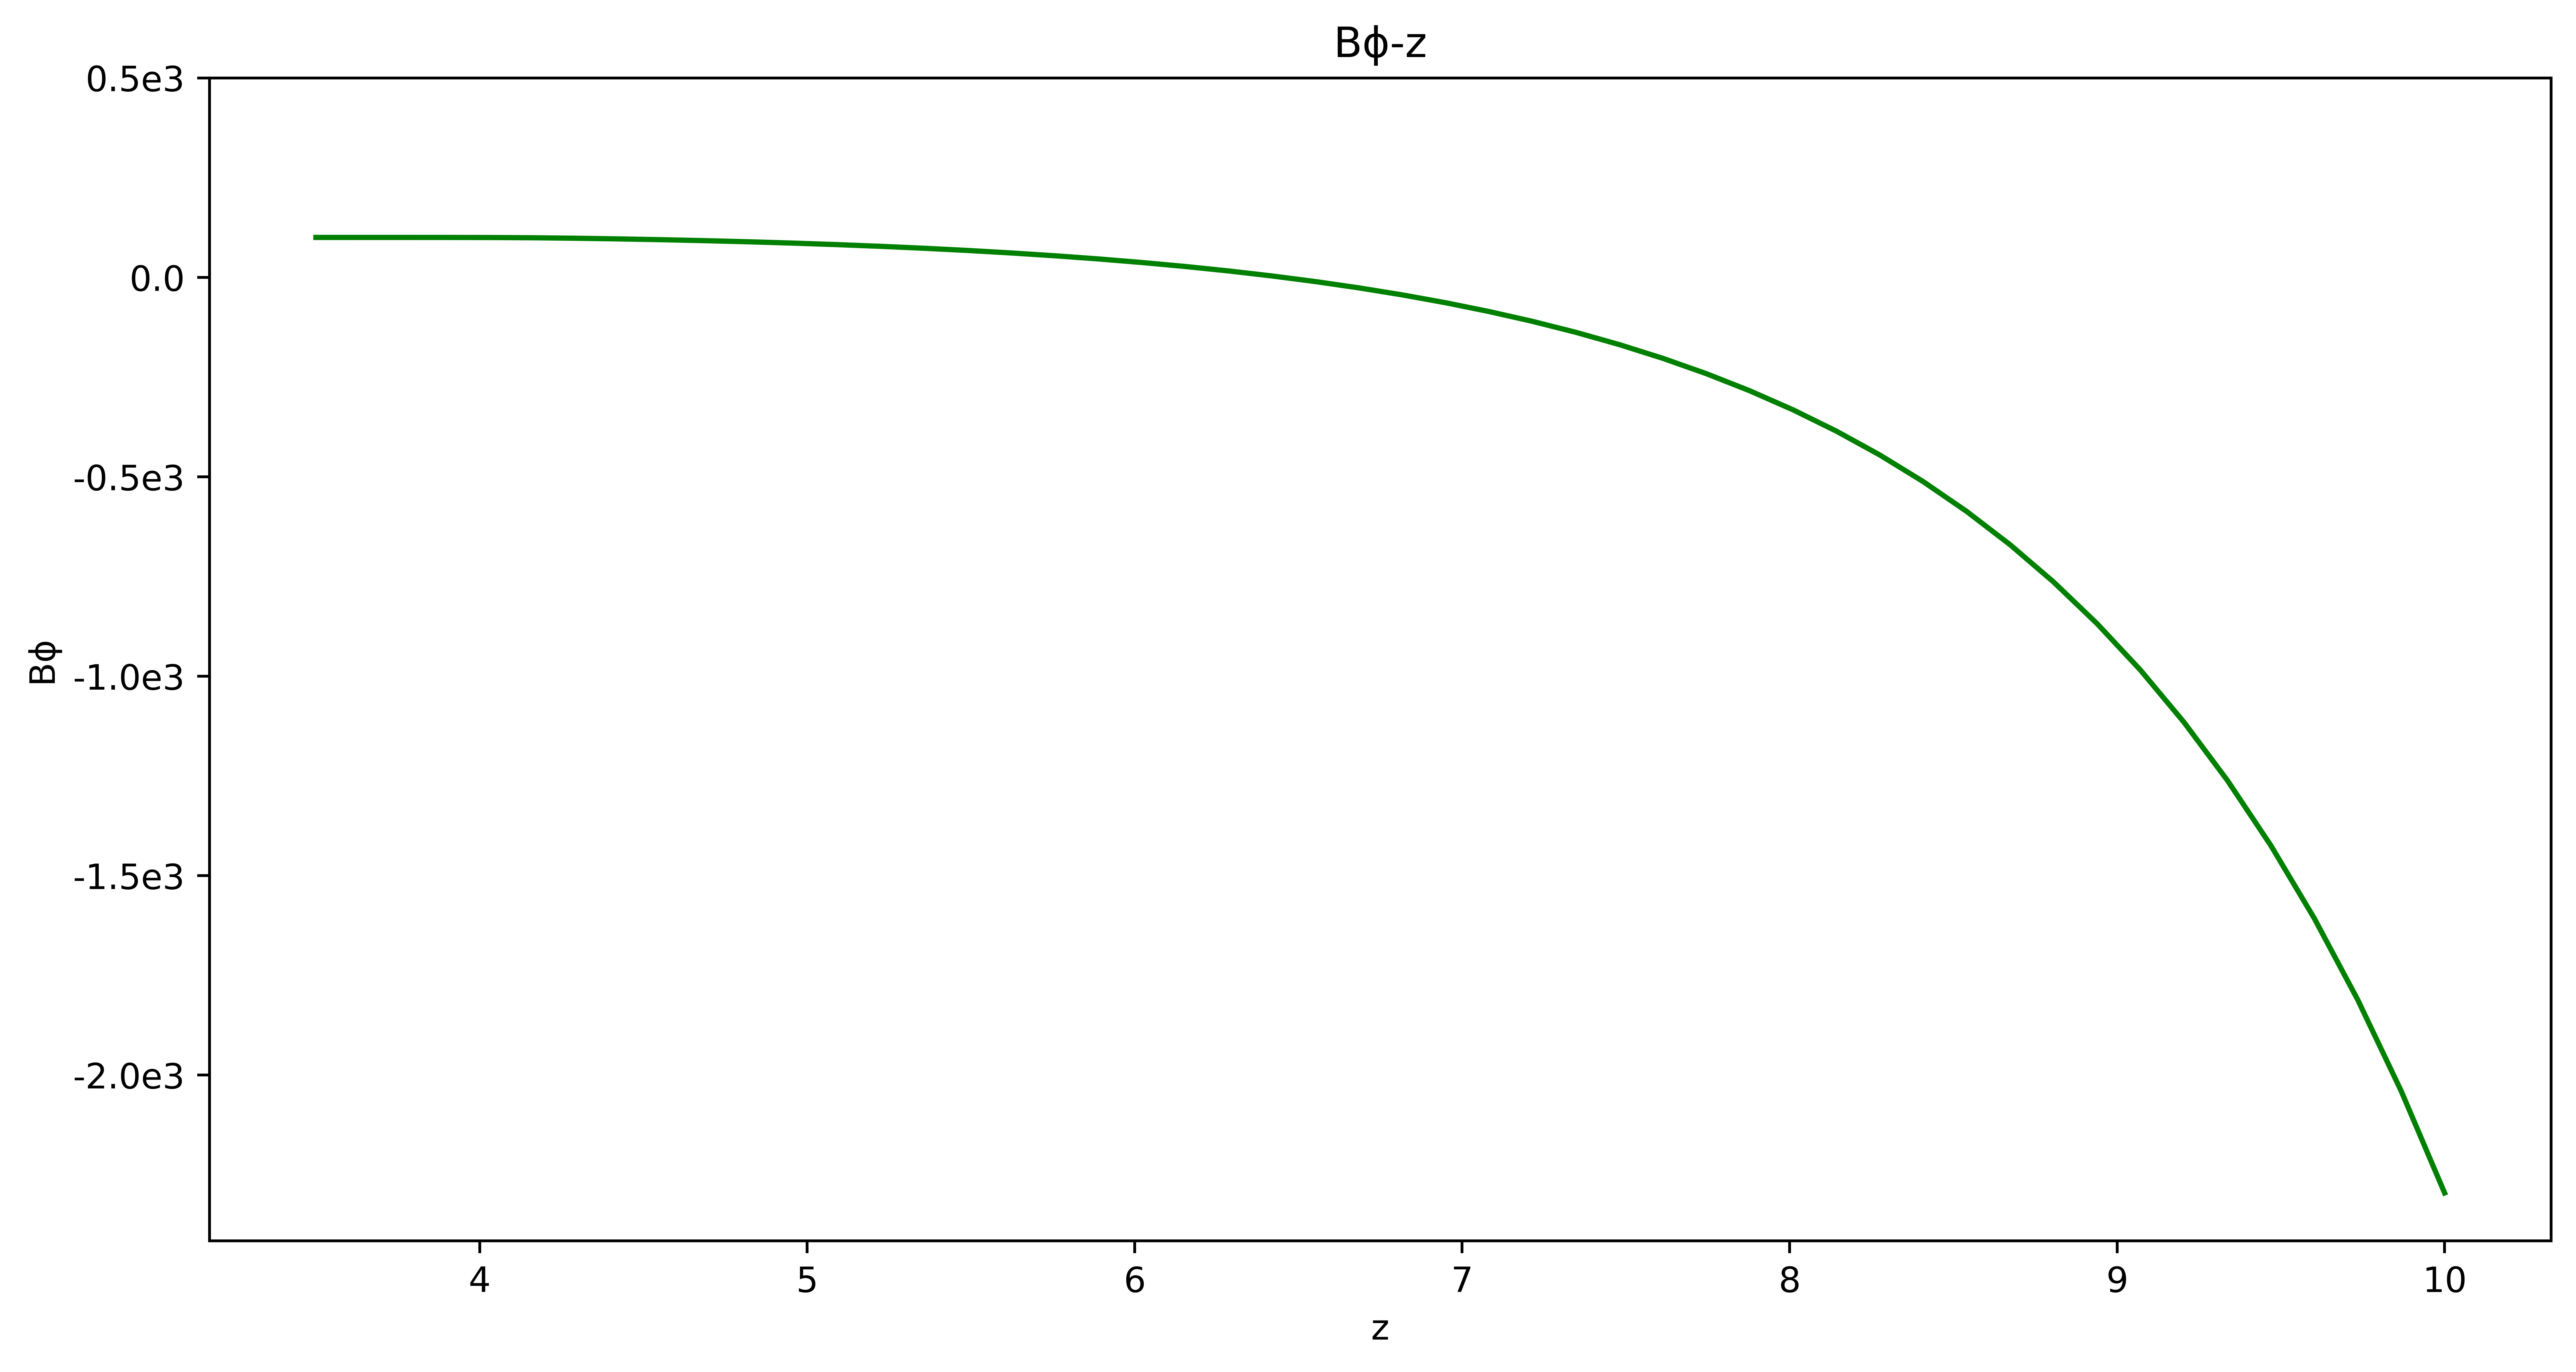

In [169]:
# plt.figure(figsize=(12,6), dpi=900)
plt.plot(z,V[:,3],c='g')
plt.xlabel("z")
plt.ylabel("Bϕ")
plt.title("Bϕ-z")
# plt.ylim(-1e3,11e3)
plt.xticks(np.arange(4,11,1))
plt.yticks(np.arange(-2e3,1e3,5e2), 
           labels=['-2.0e3','-1.5e3','-1.0e3','-0.5e3','0.0','0.5e3']) 

# plt.savefig("Bϕ")
plt.show()

In [ ]:
def B_computation(z,V):
    Vt = 1.0;
    K = 1.0;
    m = 1.0;
    Γt_zϕ = 1.0;
    Γt_ϕz = 1.0;
    Γr_tt = 1.0;
    Γr_tϕ = 1.0;
    Γt_zt = 1.0;
    Γr_ϕϕ = 1.0;
    Γr_zz = 1.0;
    Γϕ_tz = 1.0;
    Γt_tz = 1.0;
    Γϕ_zϕ = 1.0;
        
    Jr = 1.0;
    Jϕ = 1.0;
    Jz = 1.0;
    Uϕ = 1.0;
    U0 = 1.0;
    A = (z**1.5 + K*z**2.5);
    
###########################################################    
#     Bz = (2.5*K*(1+2*m/z)*z**1.5)/(Jϕ) + \
#     ((A*U0**2)/(Jϕ))*(Γr_tt + 2*V[:,1]*Γr_tϕ + V[:,1]*V[:,1]*Γr_ϕϕ + V[:,0]*V[:,0]*Γr_zz)
    Bz = (2.5*K*(1+2*m/z)*z**1.5)/(Jϕ) + \
    (1.0)
#     ((A*U0**2)/(Jϕ))*(Γr_tt + 2*V[:,1]*Γr_tϕ + V[:,1]*V[:,1]*Γr_ϕϕ + V[:,0]*V[:,0]*Γr_zz)
#############################################################
    D = ((-1.0)/(4*np.pi))*(2*z*(z**2 - 2*m)) + ((-1.0)/(4*np.pi))* \
    (((m*z)*(z**5 - 2*m*z**4 + 2*z**3 - 4*m*z**2 + z + 6*m*a**2 - 2*m)/ \
      (z**6 -4*m**2 * z**4 + 3*z**4 - 8*m**2 * z**2 + 3*z**2+4*a**2 * m**2 - 4*m**2 + 1 ))+\
     (m / z*(z+2*m)) +  ((m*z)/((1+z**2)*(np.sqrt(z)+2*m))))*(z**2 / (z**2 + 2*m)**2)
     
    Bϕ = (1.0/(D*U0*Uϕ*Bz))*((((U0**2 * A * V[:,0]*V[:,1]*(Γt_ϕz + Γt_zϕ))/(2.0)) - \
                              ((U0**2 * V[:,0]*(1.5*z**0.5 - 2.5*K*z**1.5))/(2.0))) + \
                             ((((1 + 2*m/z)*2.5*K*z**1.5)/(2*V[:,0])) + \
                              (((A*U0**2)/(2*V[:,0]))*\
                               (Γz_tt + 2*V[:,1]*Γz_tϕ-2*V[:,0]*V[:,0]*Γt_tz + \
                            V[:,1]*V[:,1]*Γz_ϕϕ - Γt_zϕ*V[:,0]*V[:,0]*V[:,1] - \
                               Γt_ϕz*V[:,0]*V[:,0]*V[:,1] + V[:,0]*V[:,0]*Γz_zz))))  
                             
    
    
    
    
    
    
    
    
    return Bz